### Ensemble
- Bagging : 부트 스트랩 샘플링
    - Random Forest
- Boosting : 이전 트리의 실수를 학습
    - AdaBoost : 오분류된 샘플에 가중치를 주는 방식
    - Gredient Boosing : 모델의 Error 을 줄이는 방식

- Ensemble Classifier
  - 모든 모델의 정답을 맞출 확률은 $\theta$ 로 똑같다.
  - 개별 모델은 이진분류 (0 또는 1) 이므로 이항분포를 따른다.
  - 앙상블에 적용되는 모든 각 모델들은  0.5 이상의 정확도를 가지고 있어야 한다.
  - 성능: 홀수 개> 짝수

### Bagging (Bootstrap Aggragating)
- 부트스트랩 : 훈련 데이터 100 개의 샘플 중 하나씩 뽑고 다시 집어 넣는 방법을 이용하여 100개를 뽑는다. (안 뽑히는 샘플도 존재한다.)
- OOB Error (Out-of-Bag Error) : 뽑히지 않은 샘플을 이용하여 모델 성능 평가를 한다.
- 단점:
    - 샘플을 추출하다 보면 비슷한 데이터가 만들어질 확률이 증가한다.
    - 모델이 과적합이 되는 경향이 있다.
        - 해결하기 위해서 feature 도 샘플링을 한다.

### Bagging : Random Forest
- 특징
    - 결정 트리가 모여 만든 앙상블 모델
    - 결정 트리들의 투표 결과
    - 샘플과 피쳐를 랜덤으로 추출하여 트리 학습
    - 즉 모든 트리들은 다양한 샘플과 특성을 학습한다.

- 하이퍼 파라미터
    - `n_estimator` : 결정 트리의 개수
    - `max_features` : 랜덤하게 몇개의  feature 를 뽑을까
    - `bootstrp` : False의 경우 oob_score_ 를 계산 하지 않는다.
    - `class_wight` : 훈련 시 dict 형식으로 가중치를 줄 수 있다.
    - `max_samples` : 몇개의 샘플을 뽑을 것인가. (기본적으로 훈련 데이터의 크기 만큼 뽑는다.)
- 결정 트리, 랜덤 포레스트 의 주요 파라미터 ( 보통 이정도의 조정만 해줘도 된다.)
    - 감소 시킬 수록 모델의 복잡도가 줄어들고 과적합 방지
        - `max_depth`
        - `max_features`
        - `max_leaf_nodes`
    - 증가 시킬 수록 모델의 복잡도가 줄어들고 과적합 방지
        - `min_samples_leaf`
        - `min_samples_split`

- **특이 사항**
    - 모델 판단의 시각화
    - 모델 판단 기준 확인 가능
    - 기준 모델로 사용
    - 스케일링 하지 않아도 된다.
    - IG 계산 값은 샘플 갯수를 기준으로 한다.
    - cons 
        - 개별트리가 학습이 잘 못 된경우 전체 모델에서 잘못된 결과를 초래 할 수 있다.
        - 데이터가 적을경우 과적합 위험

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [2]:
from sklearn.ensemble import RandomForestClassifier

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# Iris 에 랜덤 포레스트 적용시키기

data = pd.read_csv("../../data/heart.csv")

X = data.drop(columns=["output"])
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=209)

In [4]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("x_test: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (242, 13)
x_test:  (61, 13)
x_test:  (242,)
y_test:  (61,)


In [5]:
## Random Forest
model_RF = RandomForestClassifier(n_estimators=20,
                                  oob_score=True,
                                  max_depth=2,
                                  random_state=209)

model_RF.fit(x_train,y_train)
pred_RF = model_RF.predict(x_test)

metrics.accuracy_score(pred_RF, y_test)

0.8032786885245902

In [6]:
model_RF.oob_score_ # 뽑히지 않은 데이터로 검증

0.8181818181818182

In [7]:
ooBs = []
estimators = [i for i in range(20,100,10)]

for i in estimators:
    rfc = RandomForestClassifier(n_estimators=i,
                                  oob_score=True,
                                  max_depth=2,
                                  random_state=42)
    rfc.fit(x_train,y_train)
    ooBs.append(rfc.oob_score_)

ooBs

[0.7933884297520661,
 0.7851239669421488,
 0.8057851239669421,
 0.7975206611570248,
 0.8140495867768595,
 0.8057851239669421,
 0.8099173553719008,
 0.8181818181818182]

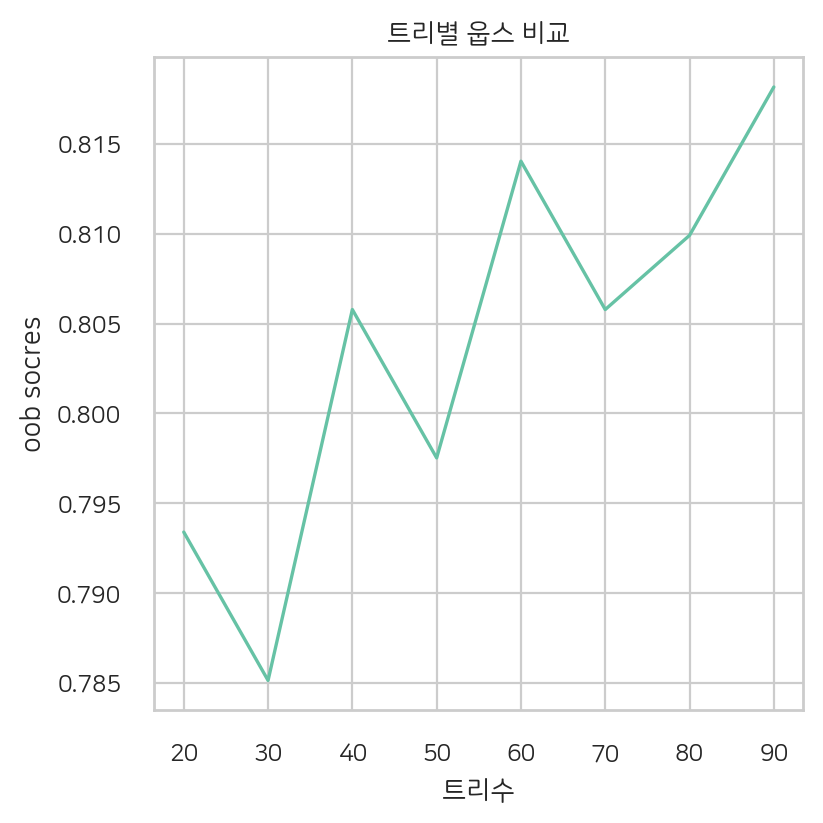

In [8]:
fig, ax = plt.subplots(figsize=(4,4))

sns.lineplot(x =estimators,
             y = ooBs, ax=ax)
ax.set(xlabel="트리수",
       ylabel="oob socres",
       title="트리별 웁스 비교");

### Bagging : Random Forest (Grid Search)

In [9]:
def grid_search(params, model_base, njobs = -1):
    model_grid = GridSearchCV(model_base,
                              params,
                              cv=5,
                              return_train_score=True,
                              n_jobs=njobs)

    model_grid.fit(x_train, y_train)

    print("최상 매개변수:", model_grid.best_params_)
    print("최고 정확도:", model_grid.best_score_)
    
    best_model = model_grid.best_estimator_
    best_pred = best_model.predict(x_test)
    print("최고 정확도", metrics.accuracy_score(y_test, best_pred))

params = {
    "max_depth": [None, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [i for i in range(5, 10, 2)],
    "min_samples_split": [4, 8],
}


In [10]:
model = RandomForestClassifier(n_estimators=300,
                               oob_score=True,
                               random_state=209)

In [11]:
%%time

grid_search(params, model,-1)

최상 매개변수: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 4}
최고 정확도: 0.8389455782312926
최고 정확도 0.8360655737704918
CPU times: user 642 ms, sys: 122 ms, total: 764 ms
Wall time: 19.3 s


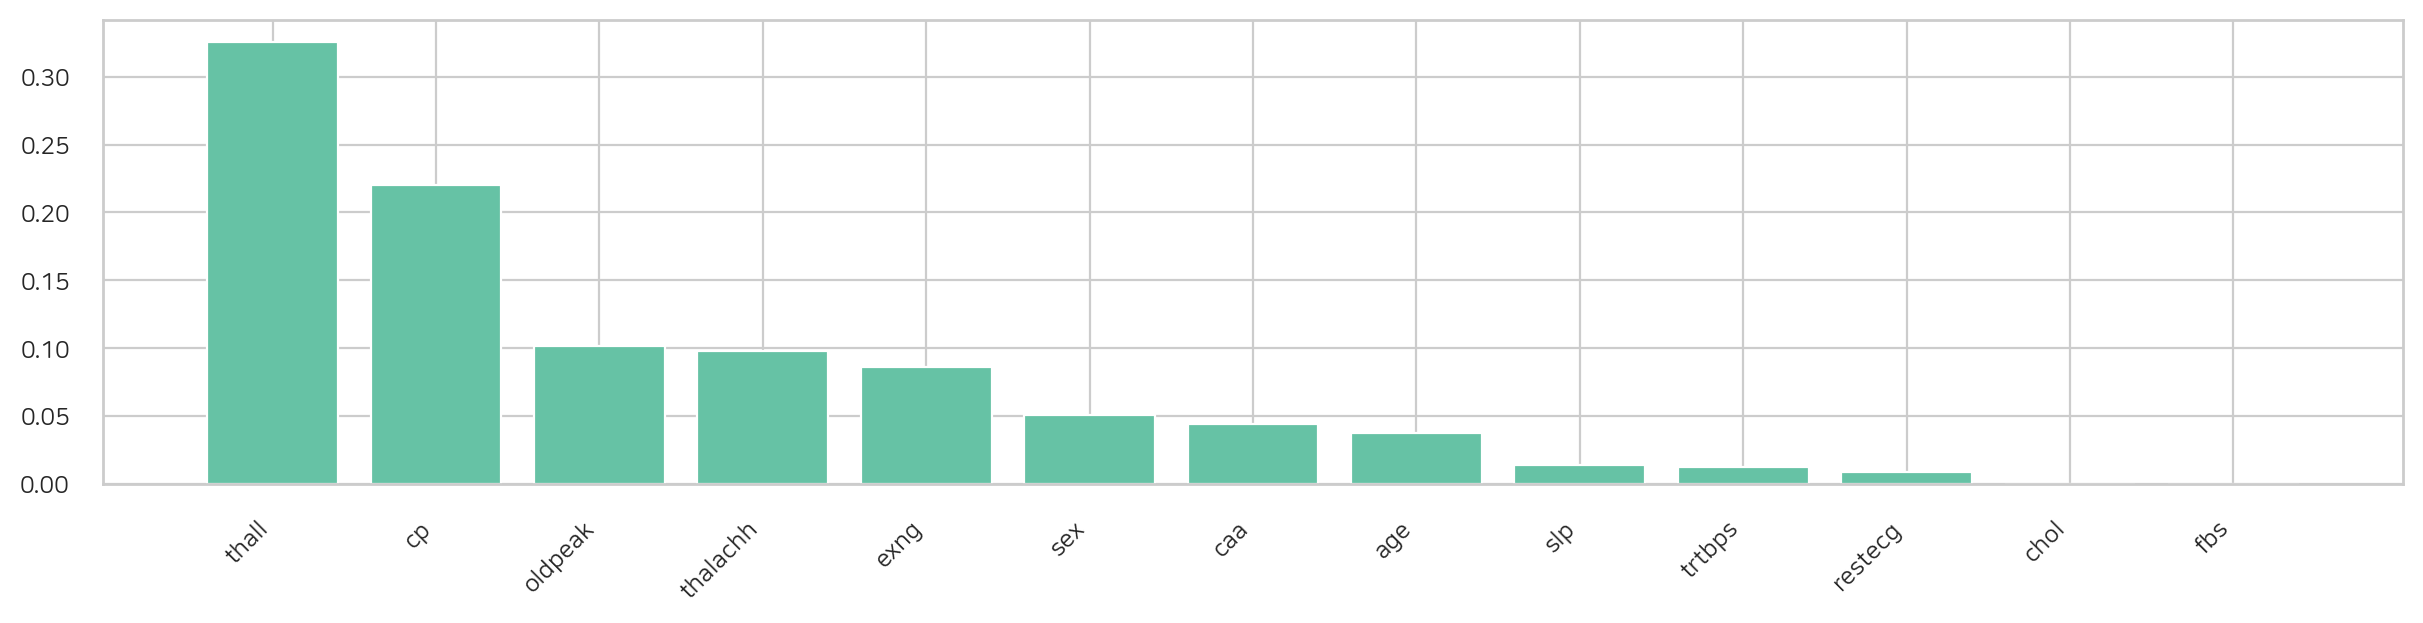

In [12]:
feature_importance = {name: importance for name, importance in zip(X.columns, model_RF.feature_importances_)}
feature_importance_sorted = {k: v for k, v in sorted(feature_importance.items(), 
                                                     key=lambda item: item[1], 
                                                     reverse = True)}

fig, ax = plt.subplots(figsize = (12,3))

ax.bar(feature_importance_sorted.keys(), feature_importance_sorted.values())
plt.setp(ax.get_xticklabels(), ha = "right", rotation = 45);

### Boosting
- 이전 트리의 실수를 학습
- 약한 학습기 -> 부스팅 -> 강력한 학습김
- 순차적인 모델 (Sequential)

### 종류
- ada boost
    - 오분류에 대해서 더많은 가중치를 준다.
- gradient boost
    - XG부스트
        -X(extreme) , Gredient 부스트
    - lightGBM
    - Catboost

### Boosting : AdaBoost
- weight 벡터 설정
$$ w = (w_1, w_2, ... , w_i) $$
- $ \text{for } j=1 \space to \space \text{M} $ 에 대하여 ($N$ 은  샘플의 수)
    - $C_j(x)$ 에 대한 에러 값 $ \varepsilon_j $ <br> $ \text{여기서 } \mathbf{1}(y_i \neq C_j(x_i)) = \begin{cases} 1, & \text{if } y_i \neq C_j(x_i) \\ 0, & \text{if } y_i = C_j(x_i) \end{cases} $
        $$ \varepsilon_j = \frac{\sum_{i=1}^{N} w_i \mathbf{1}(y_i \neq C_j(x_i))}{\sum_{i=1}^{N} w_i} $$
        
    - $C_j(x)$ 에 대한 Coefficent 값 $ \alpha_j $
    $$ \alpha_j = \text{ln}\frac{1 - \varepsilon_j}{\varepsilon_j} $$
    - 가중치 업데이트
    $$ w_i \leftarrow w_i \cdot \exp(\alpha_j \cdot \mathbf{1}(y_i \neq C_j(x_i))) $$
    - 가중치의 합이 1이 되도록 정규화하기
    $$ w_i = \frac{w_i}{\sum_{i=1}^{N} w_i} $$

- 최종 예측 계산
$$ C(x_i)= \text{argmax}_k \sum_{j=1}^{M} \alpha_j \mathbf{1} (C_j(x_i) = k) $$

- 오분류 일때 오분류한 샘플에 대하여 가중치가 높게 부여되어 다음학습에 크게 작용된다

- 예시
    - 첫번째 학습기 : 총 10 개 중 9, 10 번샘플 오답, 정확도 0.8
        - 가중치 01 ~ 08 : 0.025
        - 가중치 09 ~ 10 : 0.4
    - 두번째 학습기 : 9번과, 10번을 잘 맞추도록 학습 (9 번이나 10 번이 틀리면 정확도는 0.6 이기 때문에 )
        - 따라서 두번째 학습 기반 으로 예측시 9번과 10번은 잘 맞추지만 나머지 샘플에는 장담하지 못한다.

### Gradient Boosting

- Loss 값이 줄어드는 방향으로 파라미터를 결정
- error 가 거의 0이 될 때까지 학습
- gradient boosting은 손실함수의 [**경사 하강**]
- 종류
    - **XGBoost(eXtreme Gradient Boosting)** :
        - 계산능력 극대화
        - loss function 에 Ridge 나 LASSO 추가되어 오버피팅 방지
    - **lightGBM** :
        - depth 를 깊게 할 수 있어 loss를 더줄일 수 있다
        - XGBoost 에 비해 빠른 속도 약2배
        - 오버피팅의 위험이 있어 대량의 학습 데이터가 필요
    - **CatBoost** :
        - feature 가 Categorical 일때 효율적

### Gradient Boosting : AdaBoost

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [14]:
%%time

ada_acc = []

for i in range(1,30):
    base_model = DecisionTreeClassifier(max_depth=1,random_state=42)

    ada = AdaBoostClassifier(n_estimators=i,estimator=base_model, algorithm="SAMME")
    ada.fit(x_train,y_train)
    pred_ada = ada.predict(x_test)

    ada_acc.append(metrics.accuracy_score(pred_ada,y_test))

CPU times: user 432 ms, sys: 2.66 ms, total: 434 ms
Wall time: 433 ms


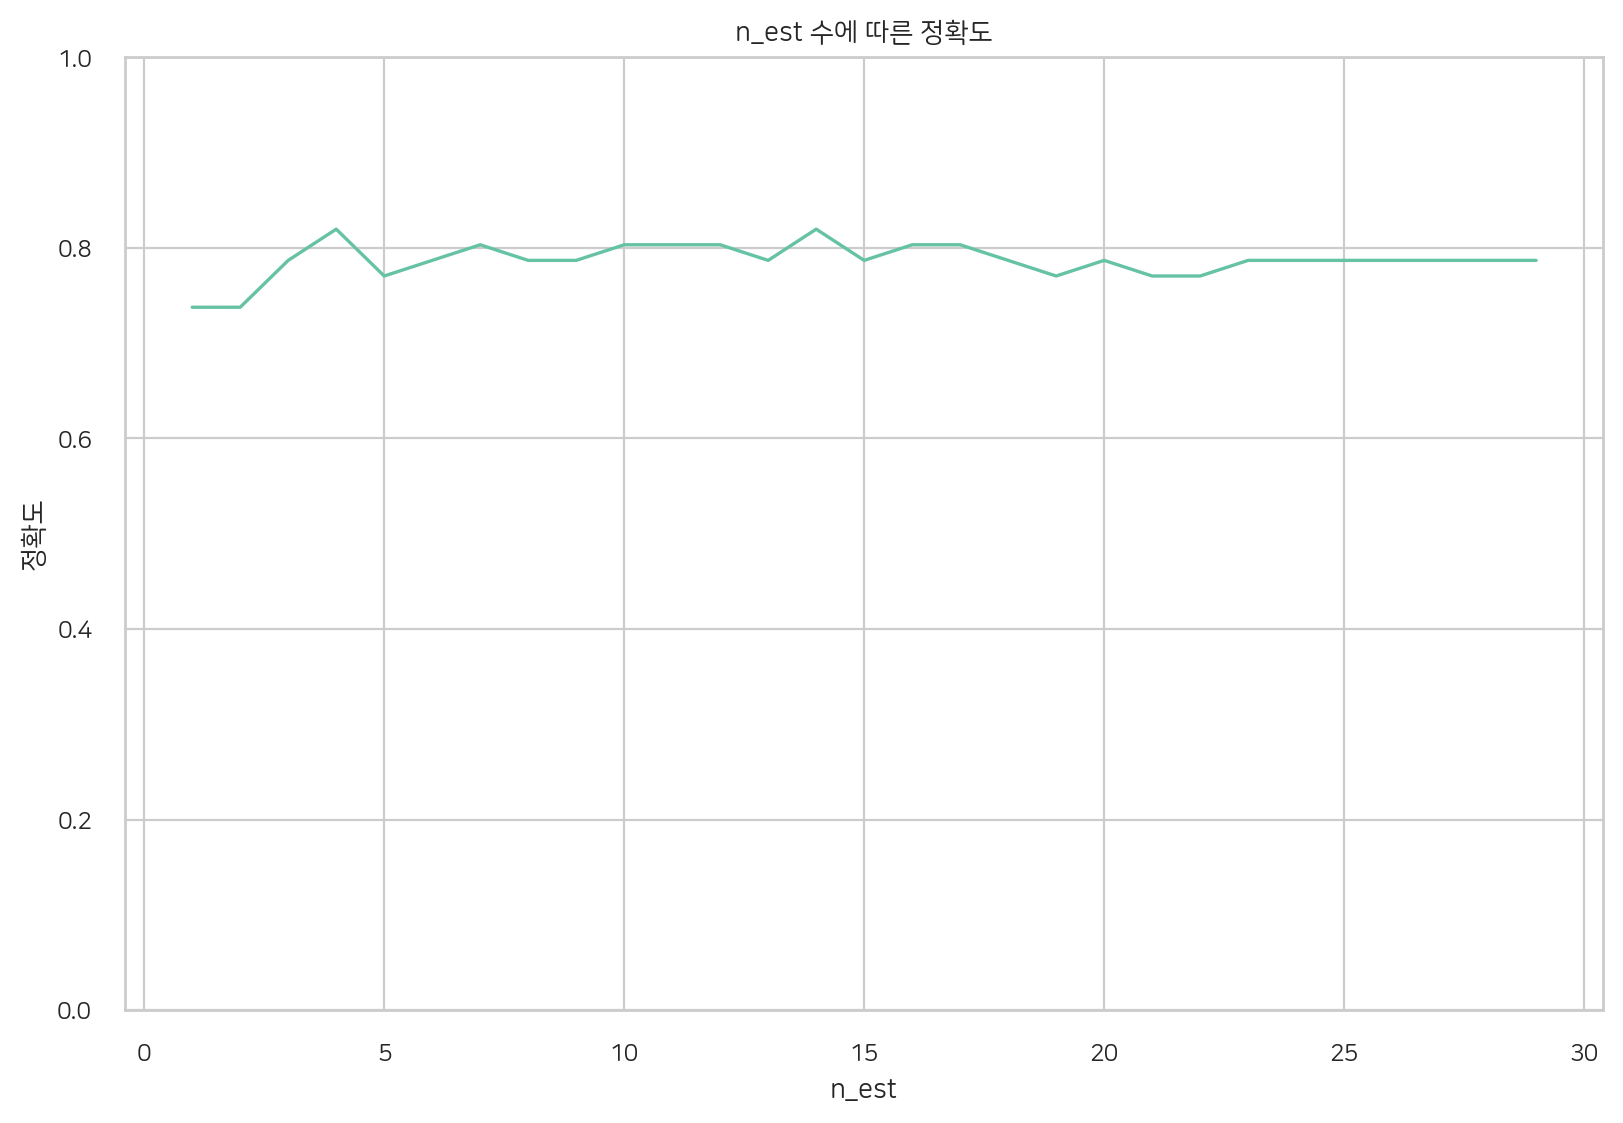

In [15]:
fig, ax = plt.subplots()
sns.lineplot(x = [i for i in range(1,30)],
             y = ada_acc,
             ax=ax)
ax.set(xlabel="n_est",
       ylabel="정확도",
       ylim = [0,1],
       title="n_est 수에 따른 정확도");

### Gradient Boosting : XGBoost
- booster : Gradient Boosting Tree
- max_depth : 기본값 6
- Learning rate 는 줄이고, n_estimators 수를 높이면 성능이 좋아진다.

In [16]:
def grid_search(params, model, core):
    model_grid = GridSearchCV(model,
                              params,
                              cv=5,
                              return_train_score=True,
                              n_jobs=core)
    model_grid.fit(x_train,y_train)

    print("최고 매개변수",model_grid.best_params_)
    print("최고 정확도",model_grid.best_score_)

    model_best = model_grid.best_estimator_
    pred_best = model_best.predict(x_test)
    print("테스트에 대한 정확도",metrics.accuracy_score(pred_best, y_test))

    return model_best

params = {"max_depth" : [1,2,3],
    "learning_rate" : np.arange(0.01, 0.1, 0.005),
    "n_estimators" : np.arange(100, 300, 30)}

xgb = XGBClassifier(booster = "gbtree",
                    objective = "binary:logistic")

In [17]:
%%time
best_model = grid_search(params, xgb, -1)

최고 매개변수 {'learning_rate': np.float64(0.019999999999999997), 'max_depth': 1, 'n_estimators': np.int64(280)}
최고 정확도 0.8513605442176871
테스트에 대한 정확도 0.8524590163934426
CPU times: user 1.55 s, sys: 94.1 ms, total: 1.65 s
Wall time: 13.2 s


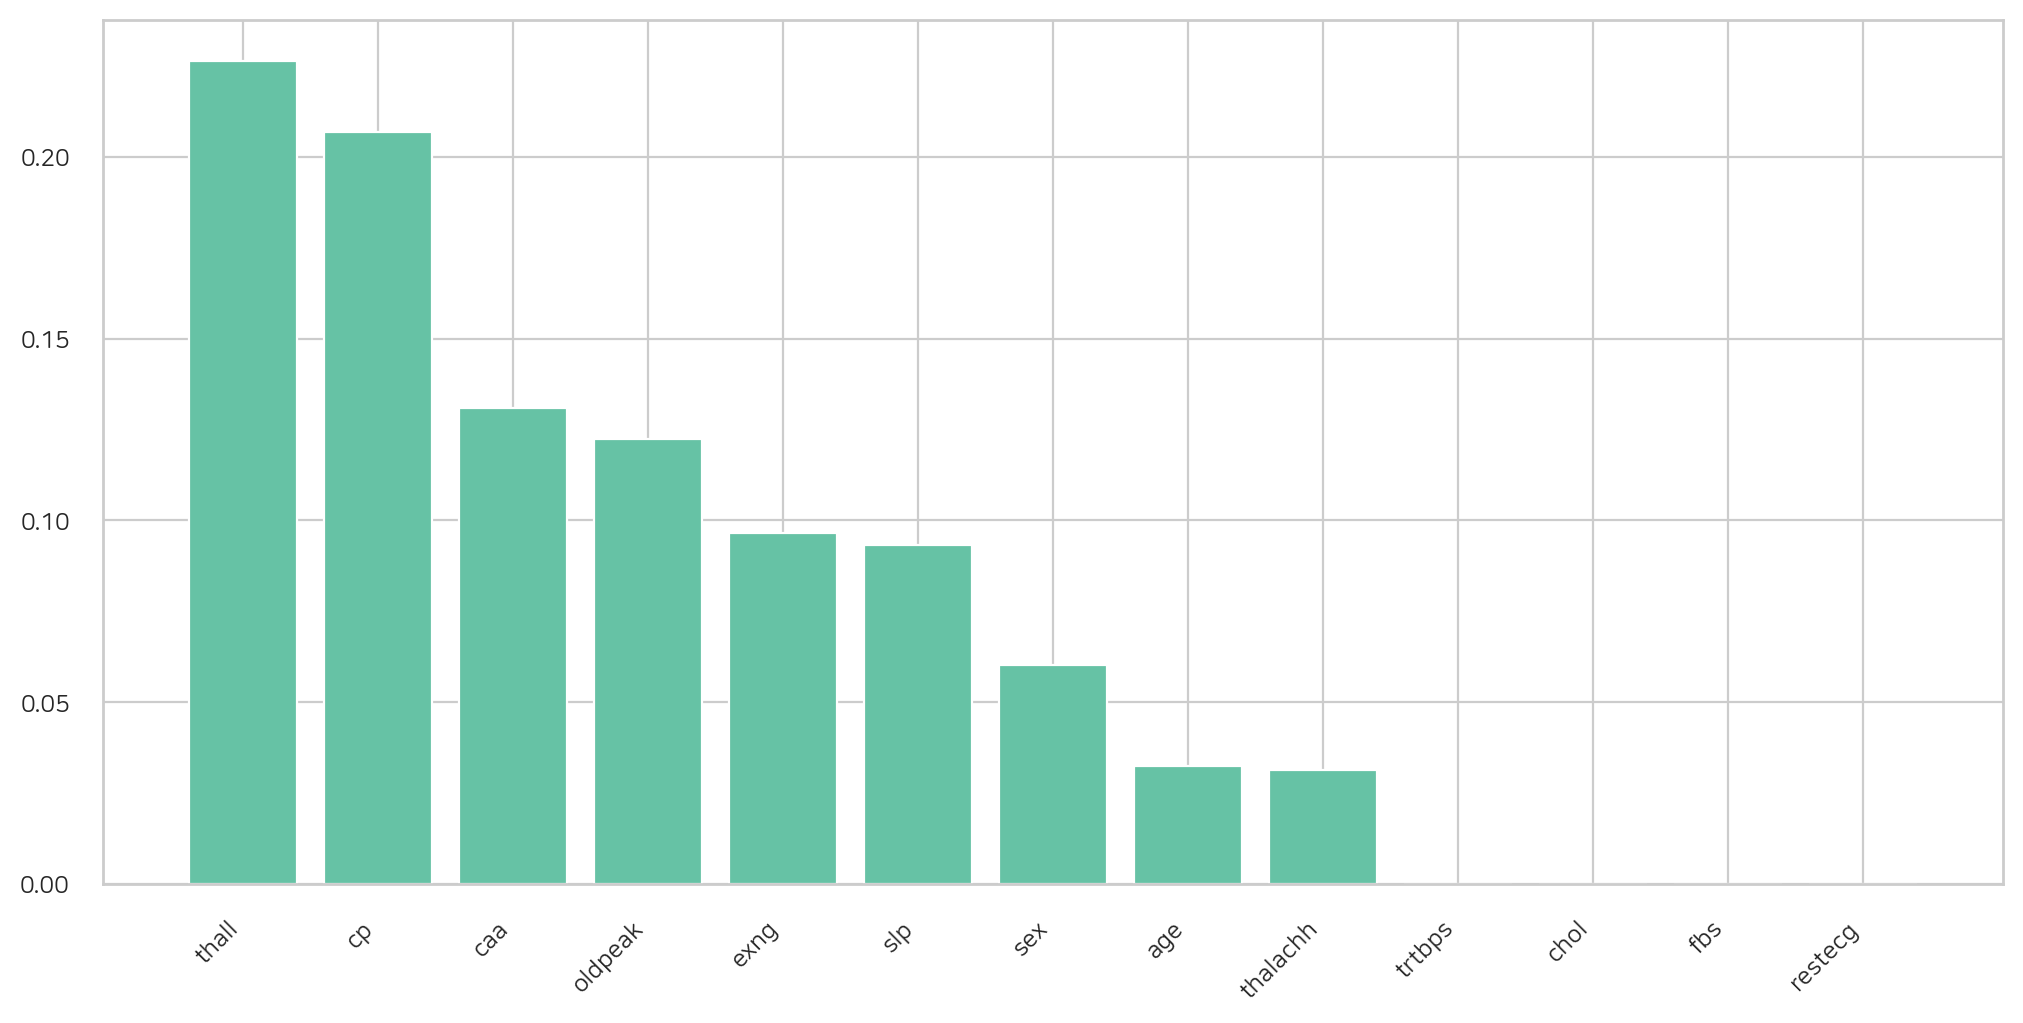

In [18]:
importances = {}
for i in range(len(data.keys())-1):
    importances[data.keys()[i]] = best_model.feature_importances_[i]

sorted_keys = sorted(importances, key=importances.get ,reverse=True)
sorted_values = [importances[key] for key in sorted_keys]

fig, ax = plt.subplots(1,1,figsize = (10,5))

ax.bar(sorted_keys, sorted_values)
plt.setp(ax.get_xticklabels(), ha = "right", rotation = 45);